In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import numpy as np
import scipy.stats as sps
import json, pickle, os, corner, glob
import enterprise.signals.utils as utils
from enterprise.pulsar import Pulsar
import arviz as az

import warnings
warnings.filterwarnings('ignore')

In [3]:
import la_forge.diagnostics as dg
import la_forge.core as co
from la_forge.rednoise import plot_rednoise_spectrum, plot_free_spec
from la_forge.utils import epoch_ave_resid

In [4]:
current_path = os.getcwd()
splt_path = current_path.split("/")
top_path_idx = splt_path.index("akaiser")
#top_path_idx = splt_path.index("nanograv")
top_dir = "/".join(splt_path[0 : top_path_idx + 1])

# J0613

In [4]:
chaindir_J0613 = os.getcwd()+'/chains/attempt_2'
tmparam_list_J0613 = ['Rcvr1_2_GASP_efac','Rcvr1_2_GASP_log10_ecorr','Rcvr1_2_GASP_log10_equad',
                'Rcvr_800_GASP_efac','Rcvr_800_GASP_log10_ecorr','Rcvr_800_GASP_log10_equad',
                'PB', 'A1', 'EPS1', 'EPS2',
                'lnlike','lnprior', 'chain_accept', 'pt_chain_accept']

In [5]:
psr_J0613 = co.Core(label='psr_J0613', chaindir=chaindir_J0613,fancy_par_names=tmparam_list_J0613)

Appending PTMCMCSampler sampling parameters to end of parameter list.
If unwanted please provide a parameter list.
No burn specified. Burn set to 25% of chain length, 2475
You may change the burn length with core.set_burn()
Red noise frequencies must be set before plotting most red noise figures.
Please use core.set_rn_freqs() to set, if needed.


To give the chains and their corresponding parameters to `ArviZ`, I found that the easiest way is to associate each chain/posterior with the name of the parameter. So I use the same parameters as in `la_forge`'s `fancy_par_names` as the dict keys, then use `get_param` to pull out the corresponding chain and assign them as the dict values. To convert to the `ArviZ` format, you can just call `az.convert_to_inference_data` on the created dictionary.

In [6]:
data_dict_J0613 = {}
for param, param_name in zip(psr_J0613.params,tmparam_list_J0613):
    data_dict_J0613[param_name] = psr_J0613.get_param(param)
    
az_J0613 = az.convert_to_inference_data(data_dict_J0613)

To see the summary of each parameters' chain, you can call `az.summary`. To select particular parameters you just pick out the `var_names` that correspond to the dictionary keys.

In [7]:
az.summary(az_J0613,var_names=tmparam_list_J0613[6:10])

arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 7425), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 7425), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 7425), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 7425), minimum_shape: (chains=2, draws=4)


mean     sd  hpd_3%  hpd_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
PB   -0.370  0.196  -0.729    0.008      0.007    0.005     811.0   809.0   
A1    1.930  1.377  -0.556    4.488      0.027    0.019    2526.0  2526.0   
EPS1 -3.878  0.910  -5.000   -2.281      0.028    0.020    1028.0  1028.0   
EPS2  0.098  1.418  -2.656    2.645      0.028    0.020    2537.0  2537.0   

      ess_bulk  ess_tail  r_hat  
PB       811.0    1093.0    NaN  
A1      2549.0    3151.0    NaN  
EPS1    1019.0    1705.0    NaN  
EPS2    2543.0    3174.0    NaN

This function makes a corner plot for the data, the variable selection is the same as above. You can also change the style with kind: 'kde' are smooth, 'scatter' are individual points in the parameter space, and 'hexbin' bins the data into hex bins

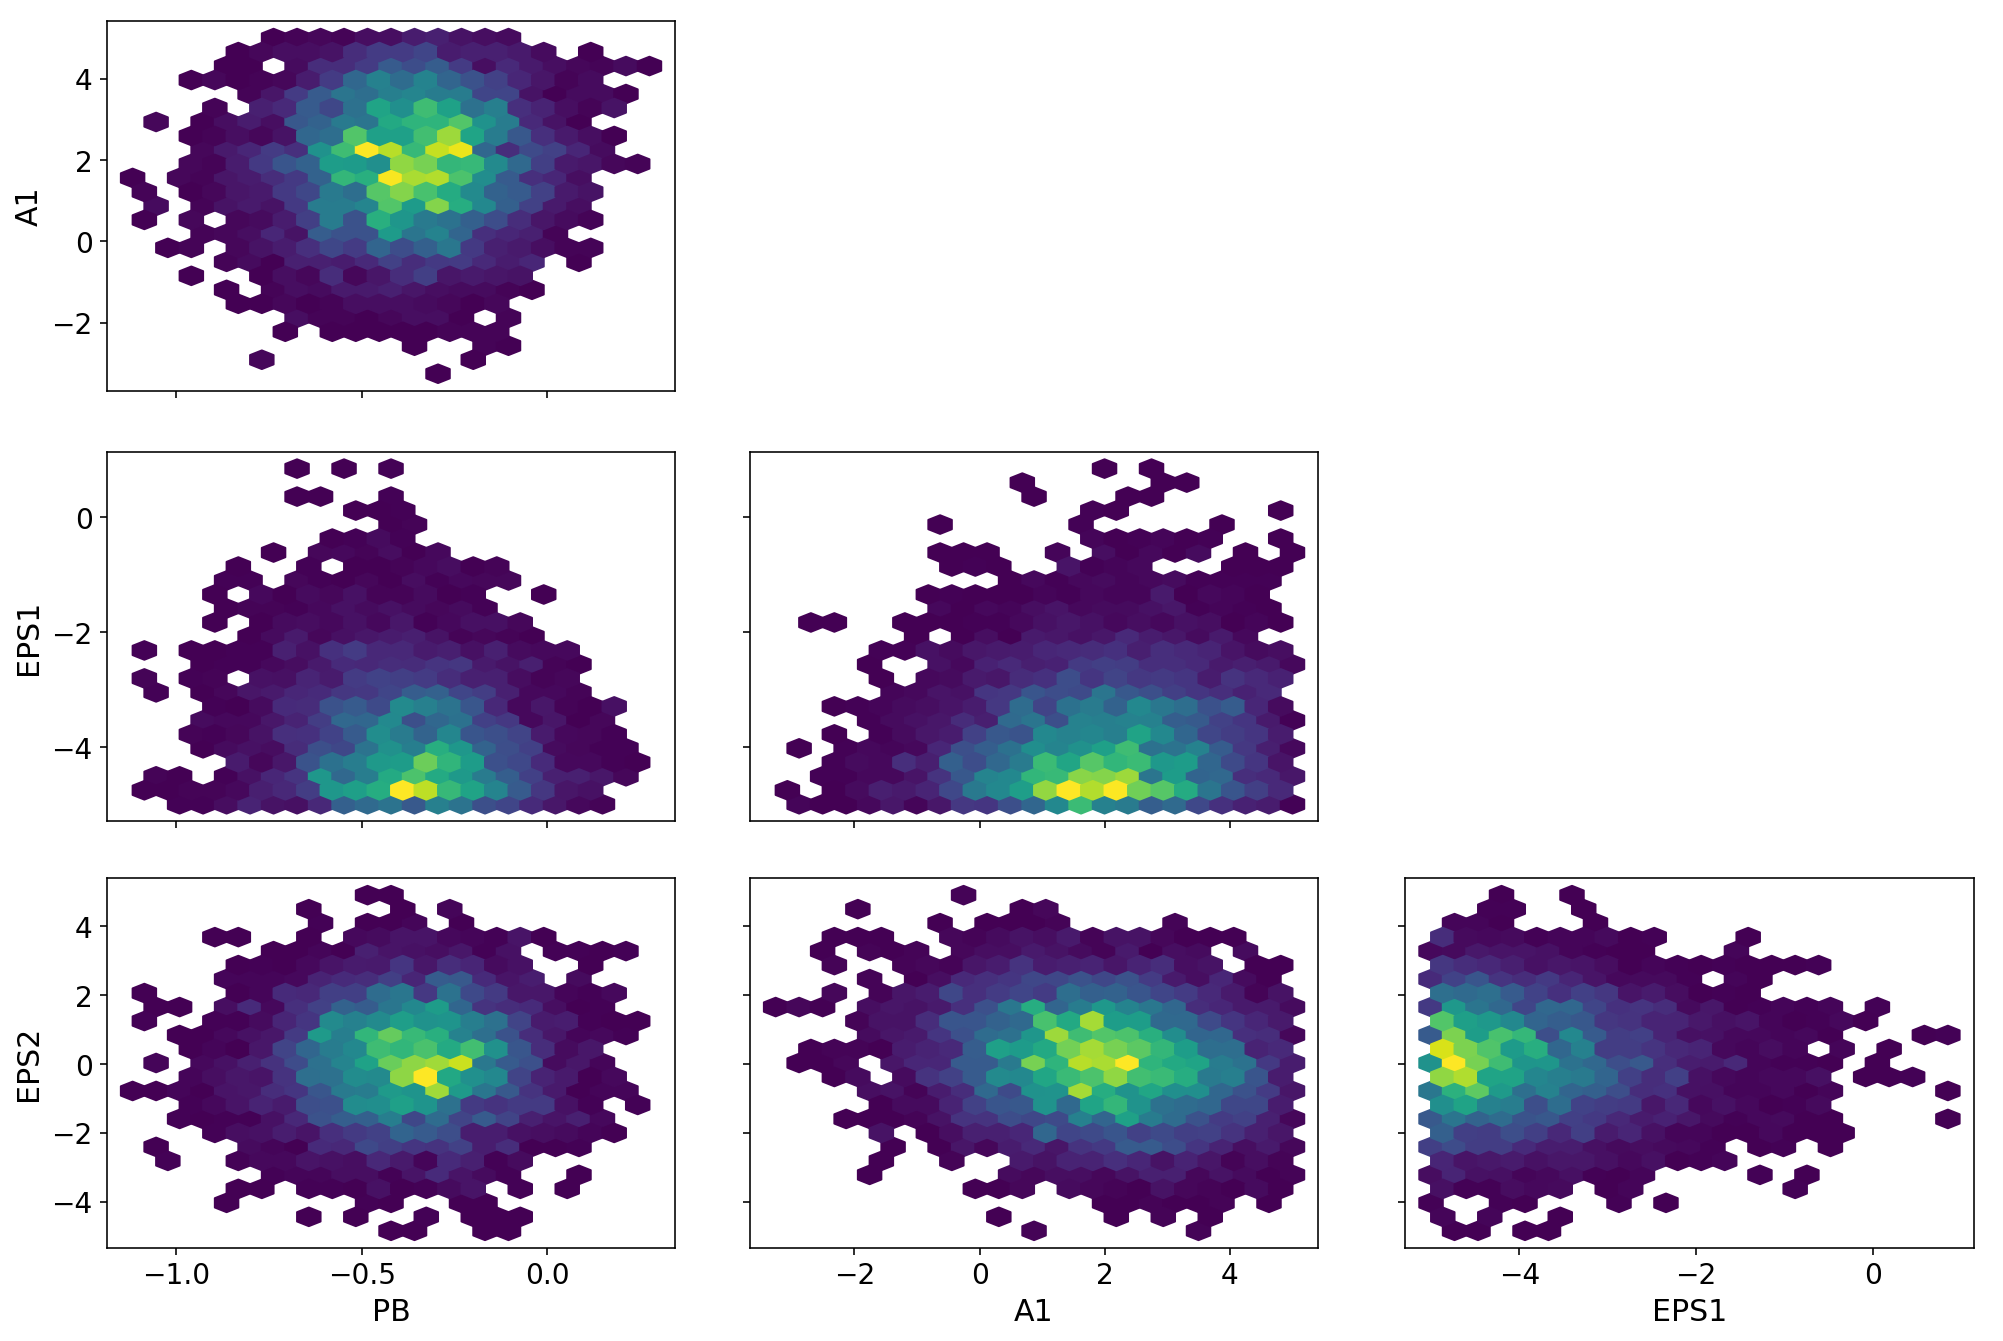

In [8]:
az.plot_pair(az_J0613,var_names=tmparam_list_J0613[6:10],kind='hexbin');

Same as the last two, but `plot_trace` give the distribution and the traceplot all in nice subplots.
If you have multiple of the same runs, `plot_trace` will overplot the two. Plus, with multiple "identical" runs, `ArviZ` can start comparing the two runs, statistically

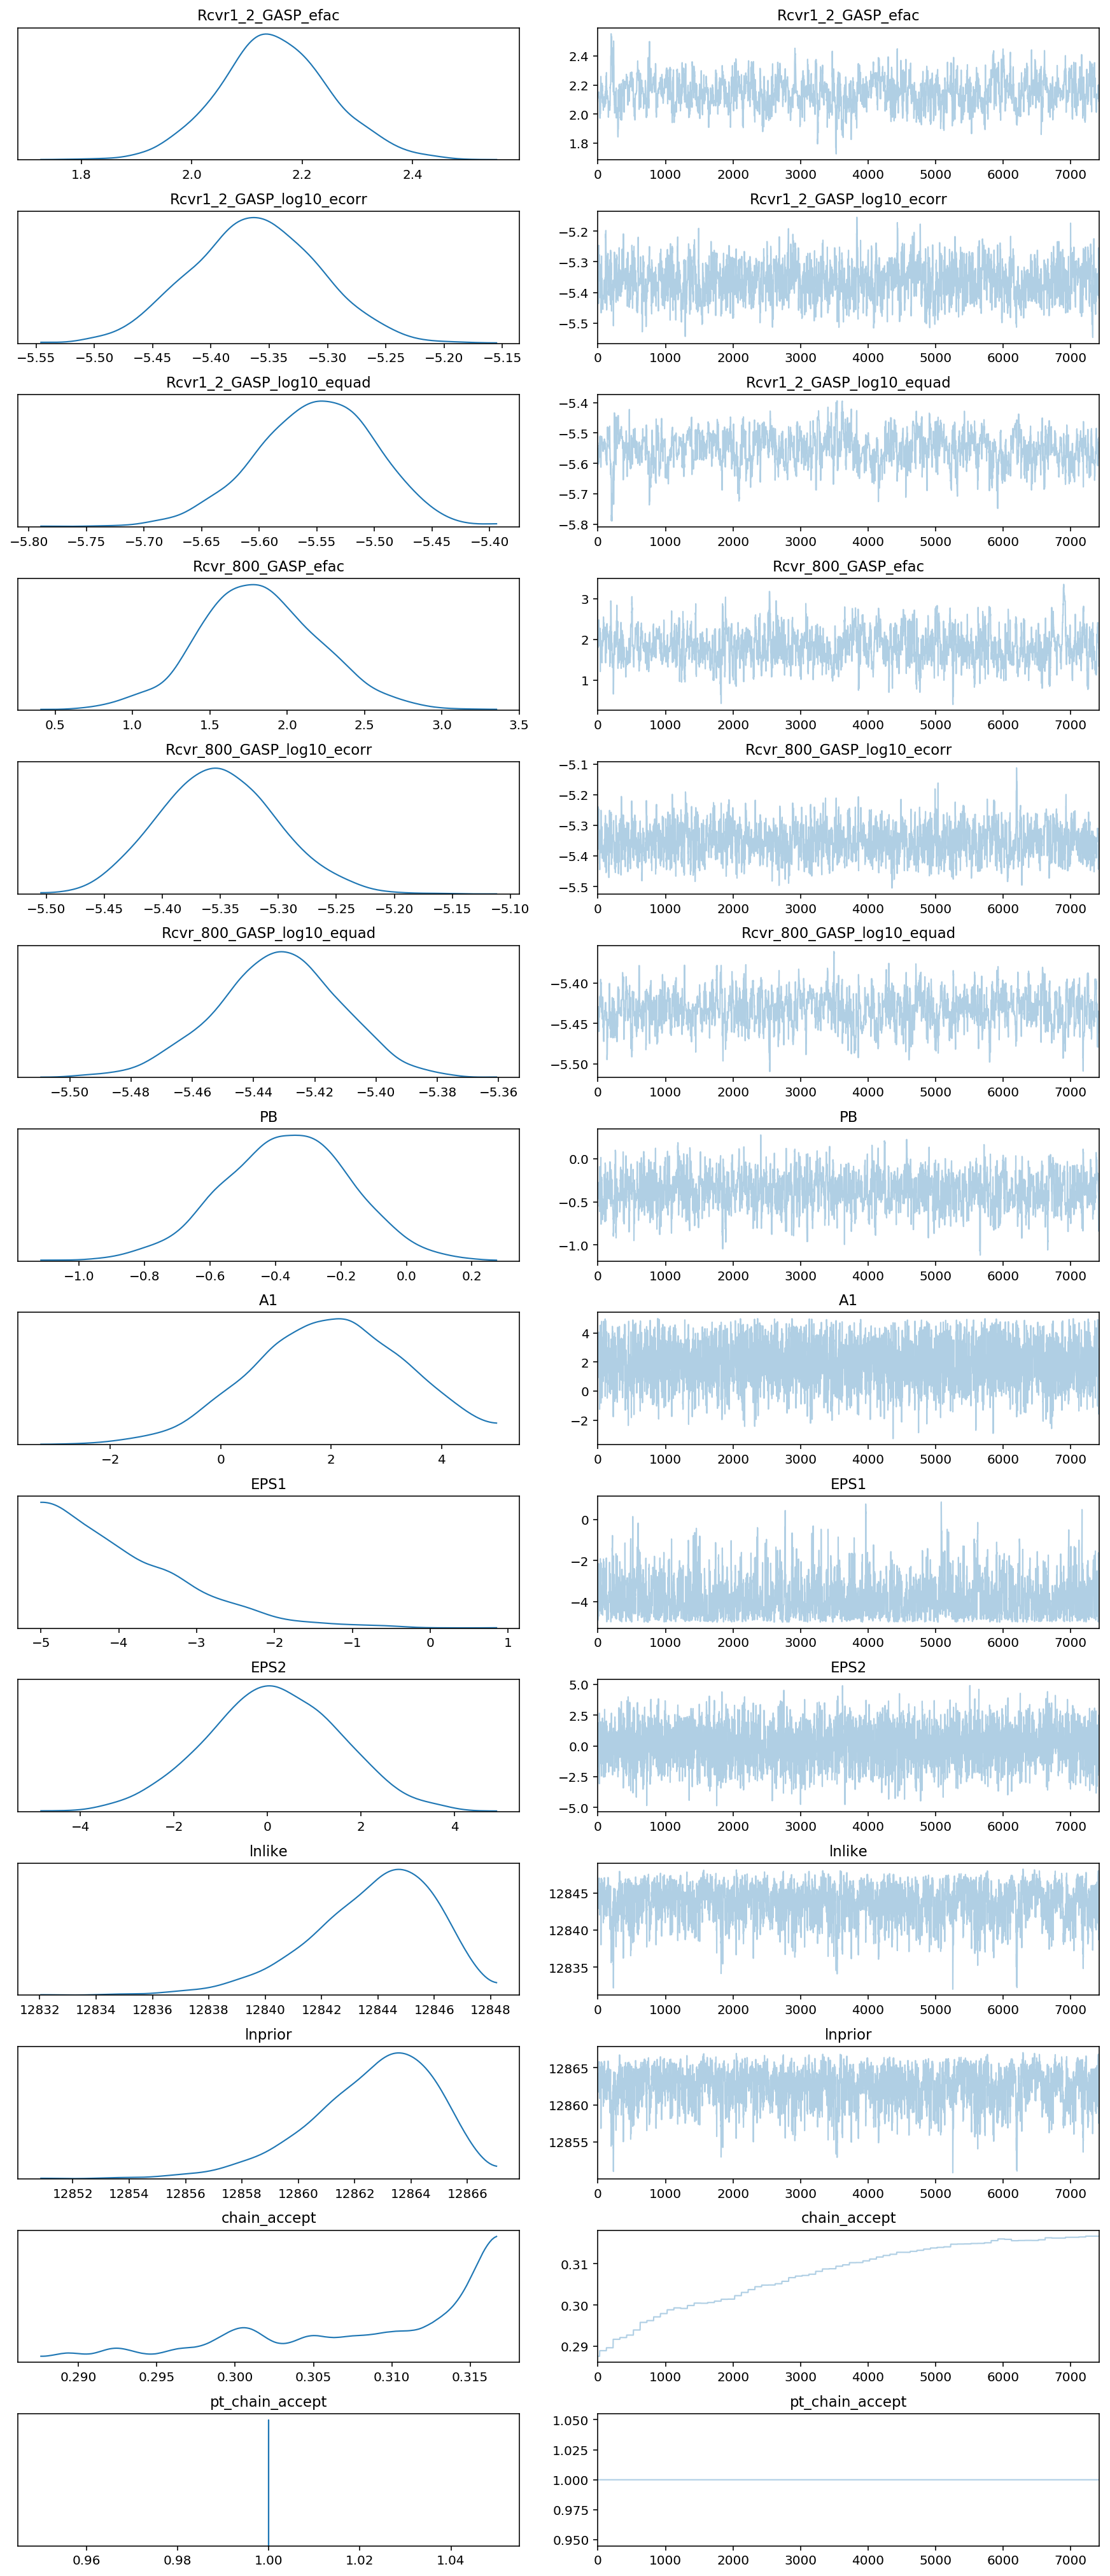

In [9]:
az.plot_trace(az_J0613);#,var_names=tmparam_list_J0613[6:10]);

# J2317

In [10]:
chaindir_J2317 = os.getcwd()+'/chains/J2317+1439'
tmparam_list_J2317 = ['327G_ASP_efac','327G_ASP_log10_ecorr','327G_ASP_log10_equad',
                '430G_ASP_efac','430G_ASP_log10_ecorr','430G_ASP_log10_equad',
                'PB', 'A1', 'EPS1', 'EPS2',
                'lnlike','lnprior', 'chain_accept', 'pt_chain_accept']

In [11]:
psr_J2317 = co.Core(label='psr_J2317', chaindir=chaindir_J2317,fancy_par_names=tmparam_list_J2317)

Appending PTMCMCSampler sampling parameters to end of parameter list.
If unwanted please provide a parameter list.
No burn specified. Burn set to 25% of chain length, 2475
You may change the burn length with core.set_burn()
Red noise frequencies must be set before plotting most red noise figures.
Please use core.set_rn_freqs() to set, if needed.


In [12]:
data_dict_J2317 = {}
for param, param_name in zip(psr_J2317.params,tmparam_list_J2317):
    data_dict_J2317[param_name] = psr_J2317.get_param(param)
    
az_J2317 = az.convert_to_inference_data(data_dict_J2317)

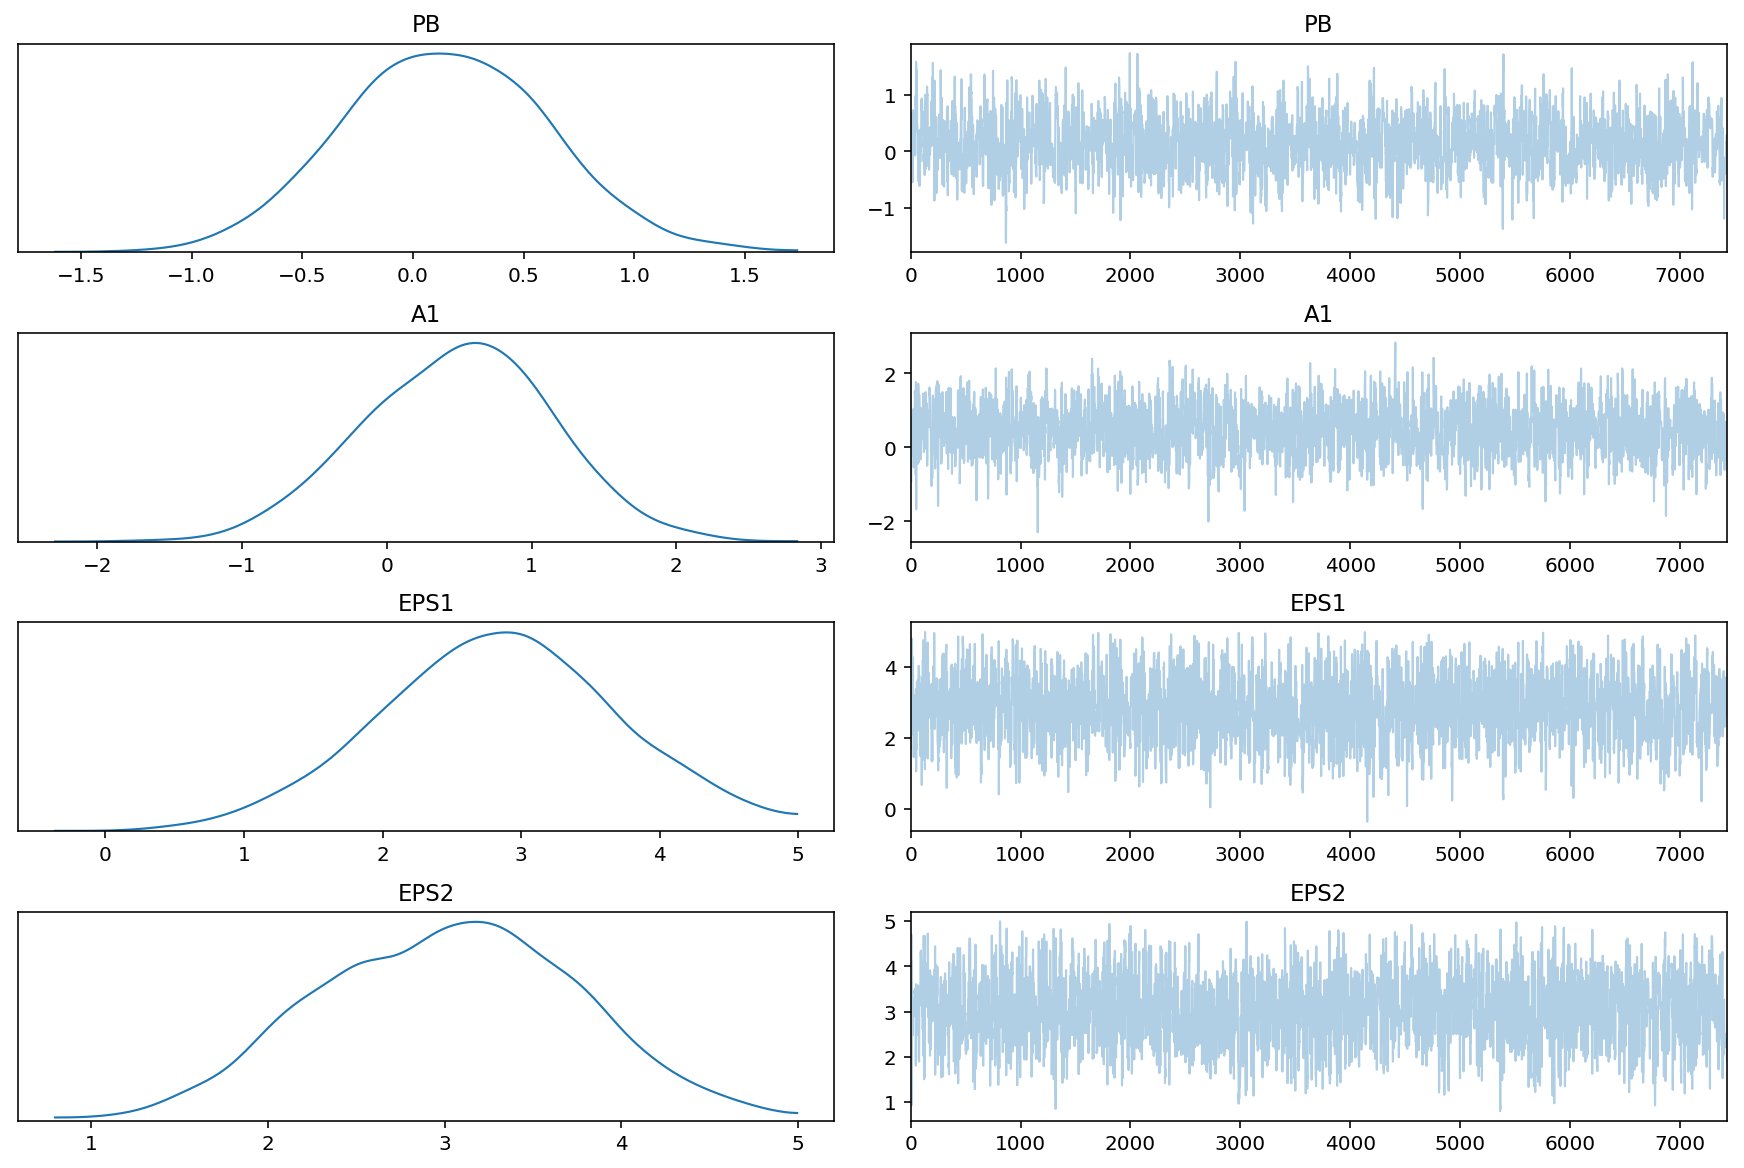

In [13]:
az.plot_trace(az_J2317,var_names=tmparam_list_J2317[6:10]);

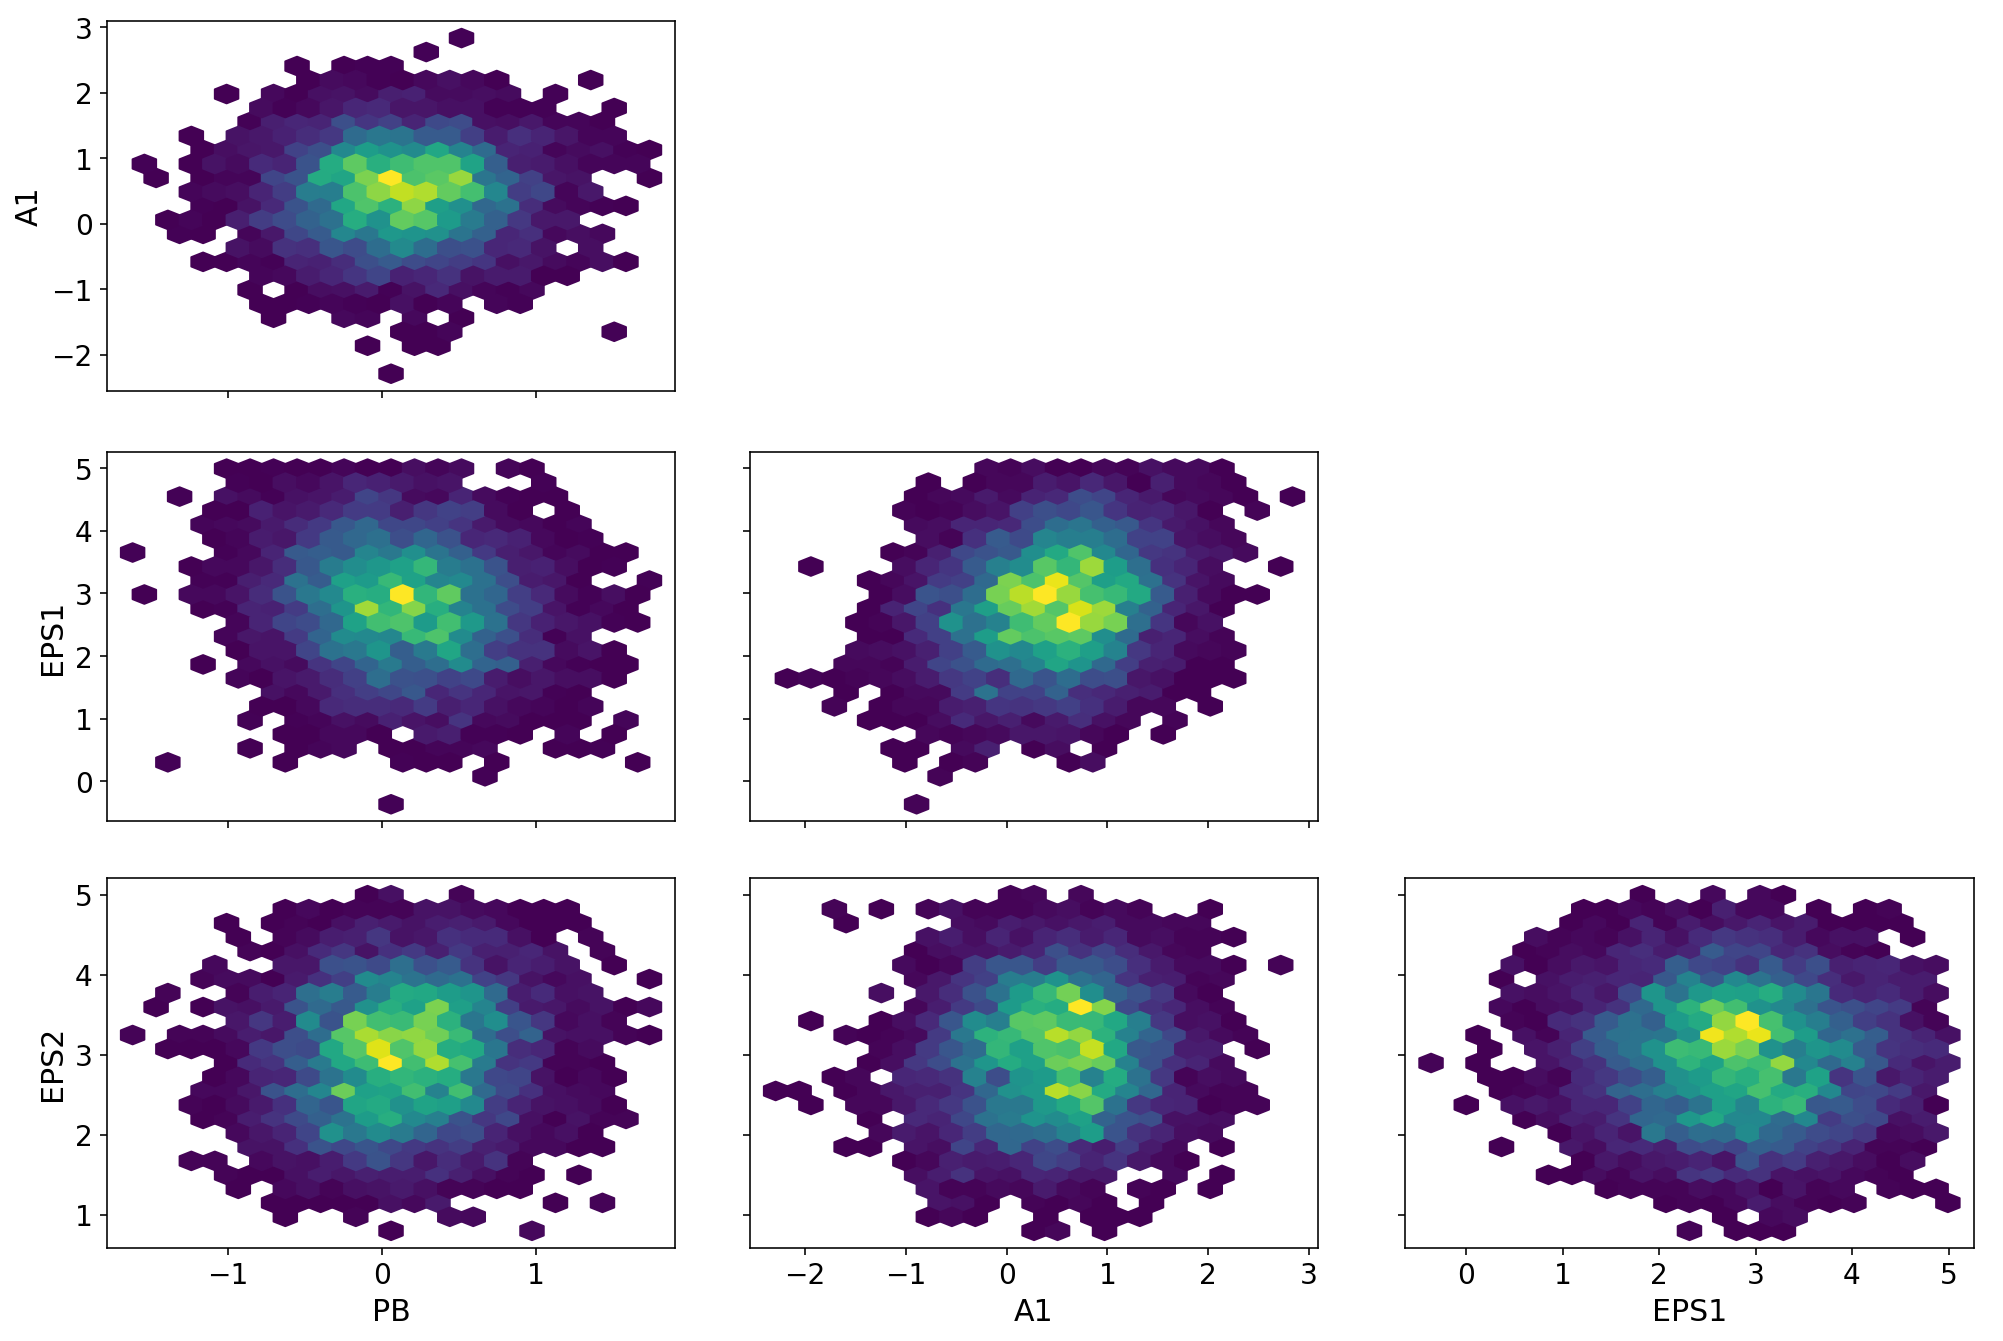

In [14]:
az.plot_pair(az_J2317,var_names=tmparam_list_J2317[6:10],kind='hexbin');

# J2317 w/Red Noise

In [15]:
chaindir_J2317_red_var = os.getcwd()+'/chains/J2317+1439_red_var'
tmparam_list_J2317_red_var = ['327G_ASP_efac','327G_ASP_log10_ecorr','327G_ASP_log10_equad',
                              '430G_ASP_efac','430G_ASP_log10_ecorr','430G_ASP_log10_equad',
                              'red_noise_gamma','red_noise_log10_A',
                              'PB', 'A1', 'EPS1', 'EPS2',
                              'lnlike','lnprior', 'chain_accept', 'pt_chain_accept']

In [16]:
psr_J2317_red_var = co.Core(label='psr_J2317_red_var',
                            chaindir=chaindir_J2317_red_var,fancy_par_names=tmparam_list_J2317_red_var)

Appending PTMCMCSampler sampling parameters to end of parameter list.
If unwanted please provide a parameter list.
No burn specified. Burn set to 25% of chain length, 2475
You may change the burn length with core.set_burn()
Red noise frequencies must be set before plotting most red noise figures.
Please use core.set_rn_freqs() to set, if needed.


In [17]:
data_dict_J2317_red_var = {}
for param, param_name in zip(psr_J2317_red_var.params,tmparam_list_J2317_red_var):
    data_dict_J2317_red_var[param_name] = psr_J2317_red_var.get_param(param)
    
az_J2317_red_var = az.convert_to_inference_data(data_dict_J2317_red_var)

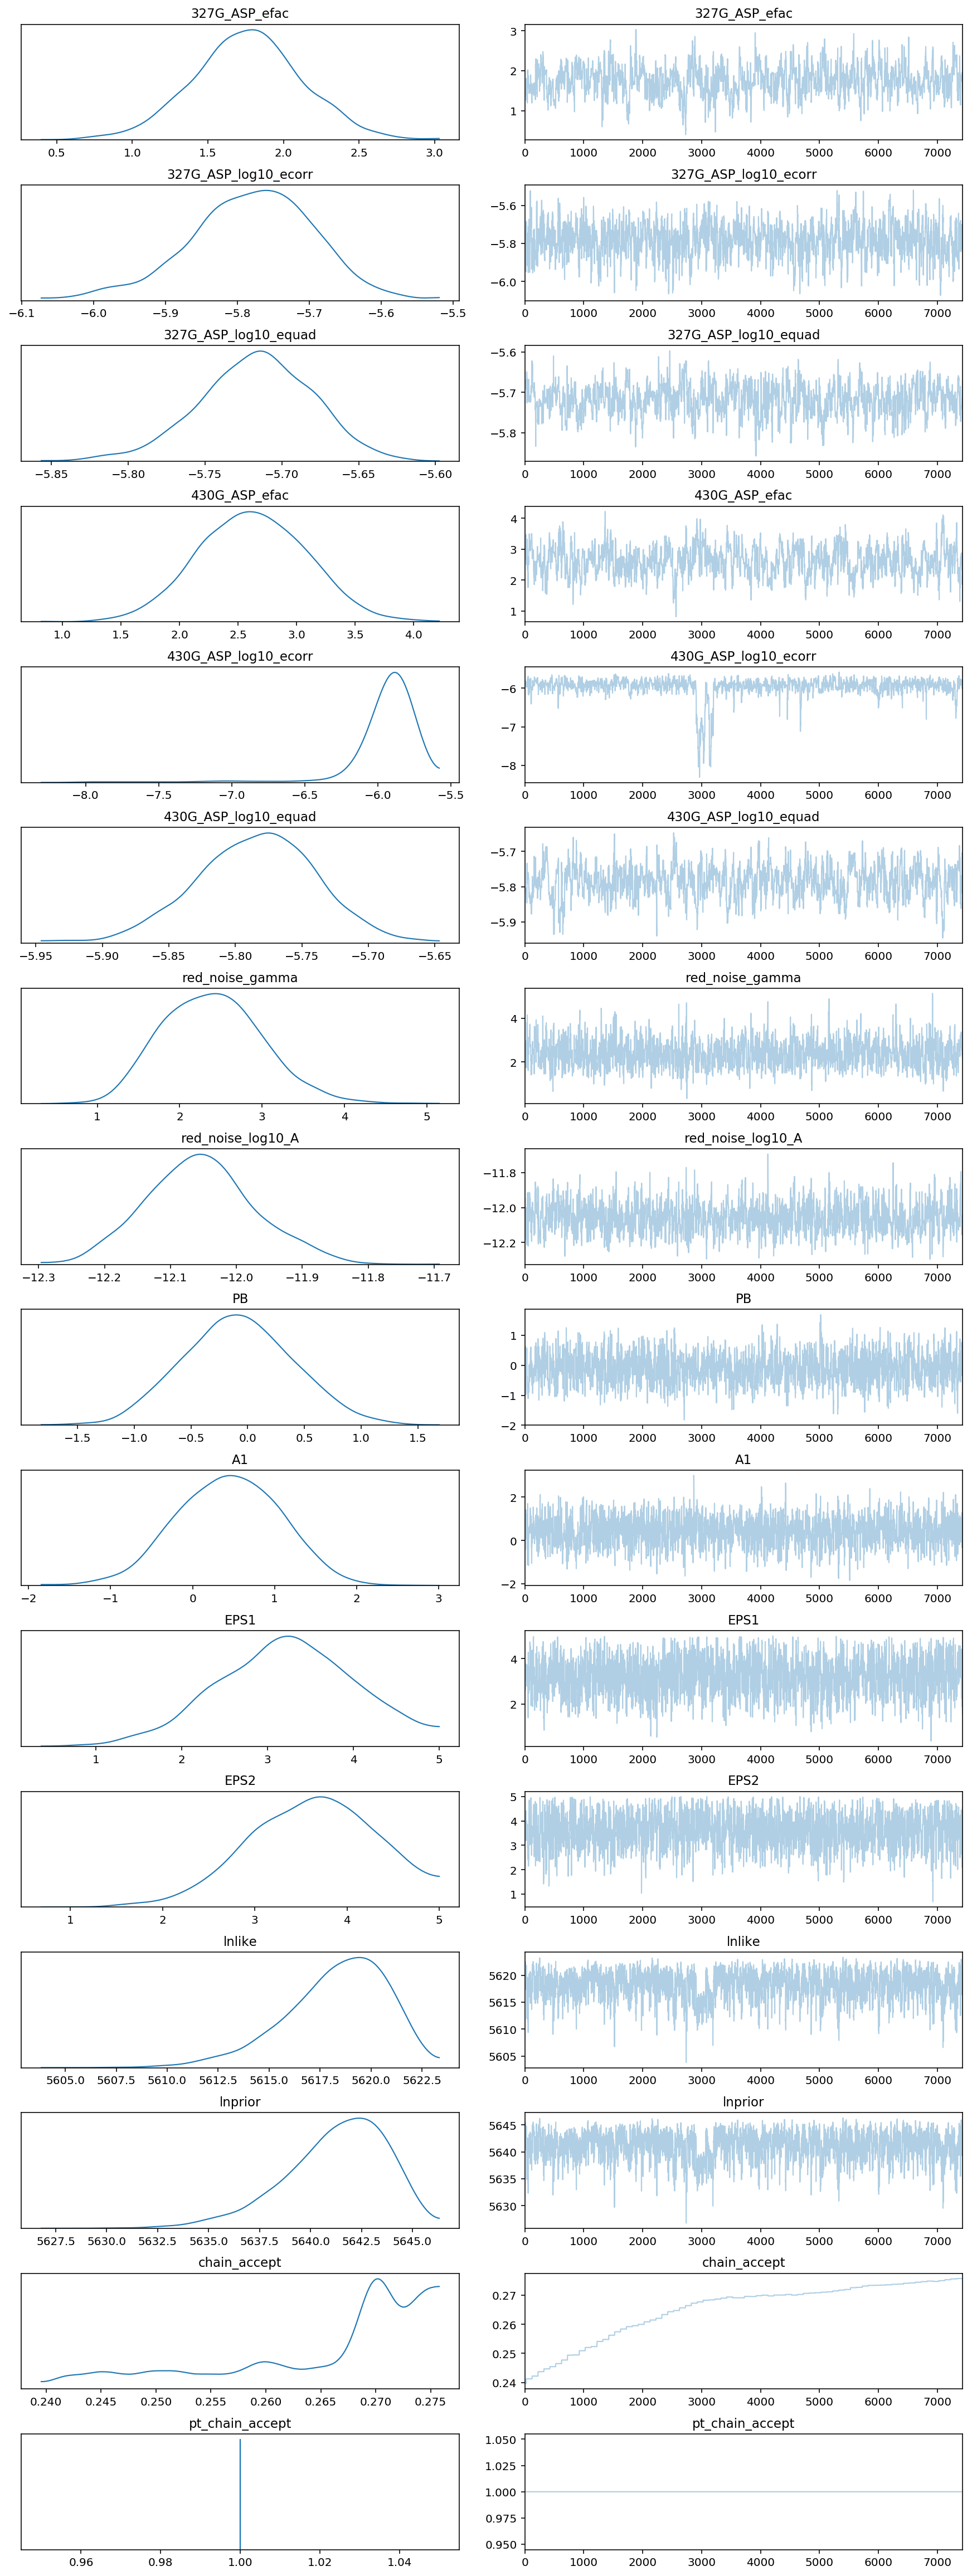

In [18]:
az.plot_trace(az_J2317_red_var,var_names=tmparam_list_J2317_red_var);

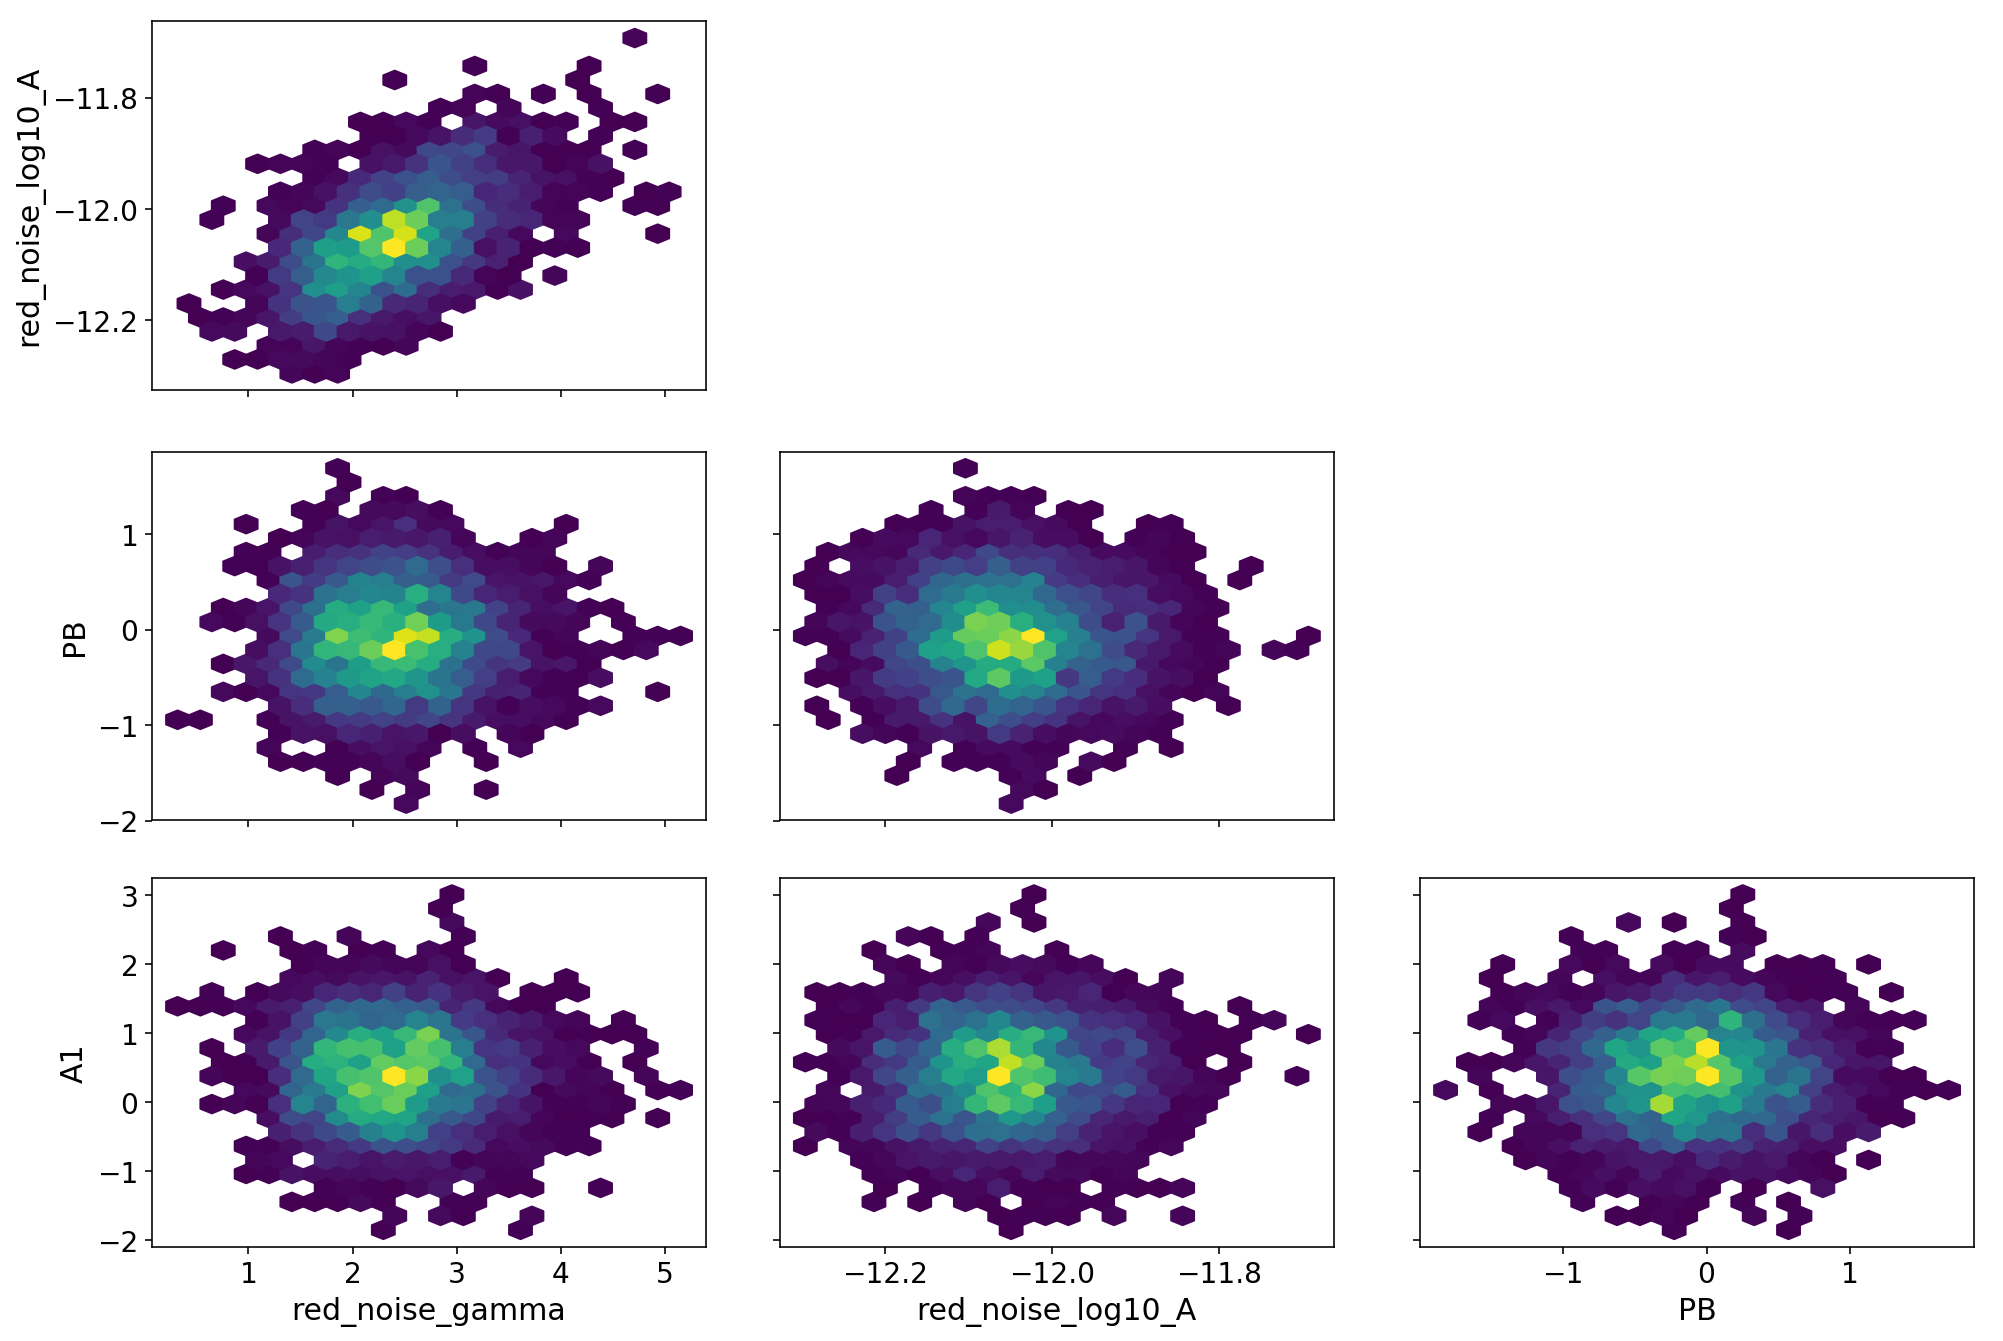

In [19]:
az.plot_pair(az_J2317_red_var,var_names=tmparam_list_J2317_red_var[6:10],kind='hexbin');

# J2317 Varied RN, Fixed WN

In [20]:
chaindir_J2317_red_var_white_fixed = os.getcwd()+'/chains/J2317+1439_red_var_white_fixed'
chaindir_J2317_red_var_white_fixed_2 = os.getcwd()+'/chains/J2317+1439_red_var_white_fixed_2'
chaindir_J2317_red_var_white_fixed_3 = os.getcwd()+'/chains/J2317+1439_red_var_white_fixed_3'
tmparam_list_J2317_red_var_white_fixed  = ['red_noise_gamma','red_noise_log10_A',
                                          'PB', 'A1', 'EPS1', 'EPS2',
                                          'lnlike','lnprior', 'chain_accept', 'pt_chain_accept']

In [24]:
psr_J2317_red_var_white_fixed = co.Core(label='psr_J2317_red_var_white_fixed',
                                        chaindir=chaindir_J2317_red_var_white_fixed,
                                        fancy_par_names=tmparam_list_J2317_red_var_white_fixed)
psr_J2317_red_var_white_fixed_2 = co.Core(label='psr_J2317_red_var_white_fixed_2',
                                        chaindir=chaindir_J2317_red_var_white_fixed_2,
                                        fancy_par_names=tmparam_list_J2317_red_var_white_fixed)
psr_J2317_red_var_white_fixed_3 = co.Core(label='psr_J2317_red_var_white_fixed_3',
                                        chaindir=chaindir_J2317_red_var_white_fixed_3,
                                        fancy_par_names=tmparam_list_J2317_red_var_white_fixed)

Appending PTMCMCSampler sampling parameters to end of parameter list.
If unwanted please provide a parameter list.
No burn specified. Burn set to 25% of chain length, 2475
You may change the burn length with core.set_burn()
Red noise frequencies must be set before plotting most red noise figures.
Please use core.set_rn_freqs() to set, if needed.
Appending PTMCMCSampler sampling parameters to end of parameter list.
If unwanted please provide a parameter list.
No burn specified. Burn set to 25% of chain length, 2475
You may change the burn length with core.set_burn()
Red noise frequencies must be set before plotting most red noise figures.
Please use core.set_rn_freqs() to set, if needed.
Appending PTMCMCSampler sampling parameters to end of parameter list.
If unwanted please provide a parameter list.
No burn specified. Burn set to 25% of chain length, 2475
You may change the burn length with core.set_burn()
Red noise frequencies must be set before plotting most red noise figures.
Please

In [25]:
comb_data_dict_J2317_red_var_white_fixed = {}
for param, param_name in zip(psr_J2317_red_var_white_fixed.params,tmparam_list_J2317_red_var_white_fixed):
    comb_data_dict_J2317_red_var_white_fixed[param_name] = np.concatenate(([psr_J2317_red_var_white_fixed.get_param(param)],
                                                                          [psr_J2317_red_var_white_fixed_2.get_param(param)],
                                                                          [psr_J2317_red_var_white_fixed_3.get_param(param)]),
                                                                          axis=0)
    
az_comb_J2317_red_var_white_fixed = az.convert_to_inference_data(comb_data_dict_J2317_red_var_white_fixed)

In [26]:
print(az_comb_J2317_red_var_white_fixed.posterior)

<xarray.Dataset>
Dimensions:            (chain: 3, draw: 7425)
Coordinates:
  * chain              (chain) int64 0 1 2
  * draw               (draw) int64 0 1 2 3 4 5 ... 7420 7421 7422 7423 7424
Data variables:
    red_noise_gamma    (chain, draw) float64 0.8923 1.997 1.449 ... 3.907 2.676
    red_noise_log10_A  (chain, draw) float64 -12.08 -11.87 ... -12.24 -12.35
    PB                 (chain, draw) float64 -0.6093 -0.6448 ... -0.02183
    A1                 (chain, draw) float64 0.7614 0.7588 ... -0.2224 -0.2224
    EPS1               (chain, draw) float64 3.732 3.775 4.01 ... -0.11 -0.11
    EPS2               (chain, draw) float64 2.49 2.489 2.561 ... 0.1211 0.1211
    lnlike             (chain, draw) float64 3.585e+03 3.585e+03 ... 6.15e+03
    lnprior            (chain, draw) float64 3.598e+03 3.598e+03 ... 6.164e+03
    chain_accept       (chain, draw) float64 0.2029 0.2029 ... 0.2579 0.2579
    pt_chain_accept    (chain, draw) float64 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
Attri

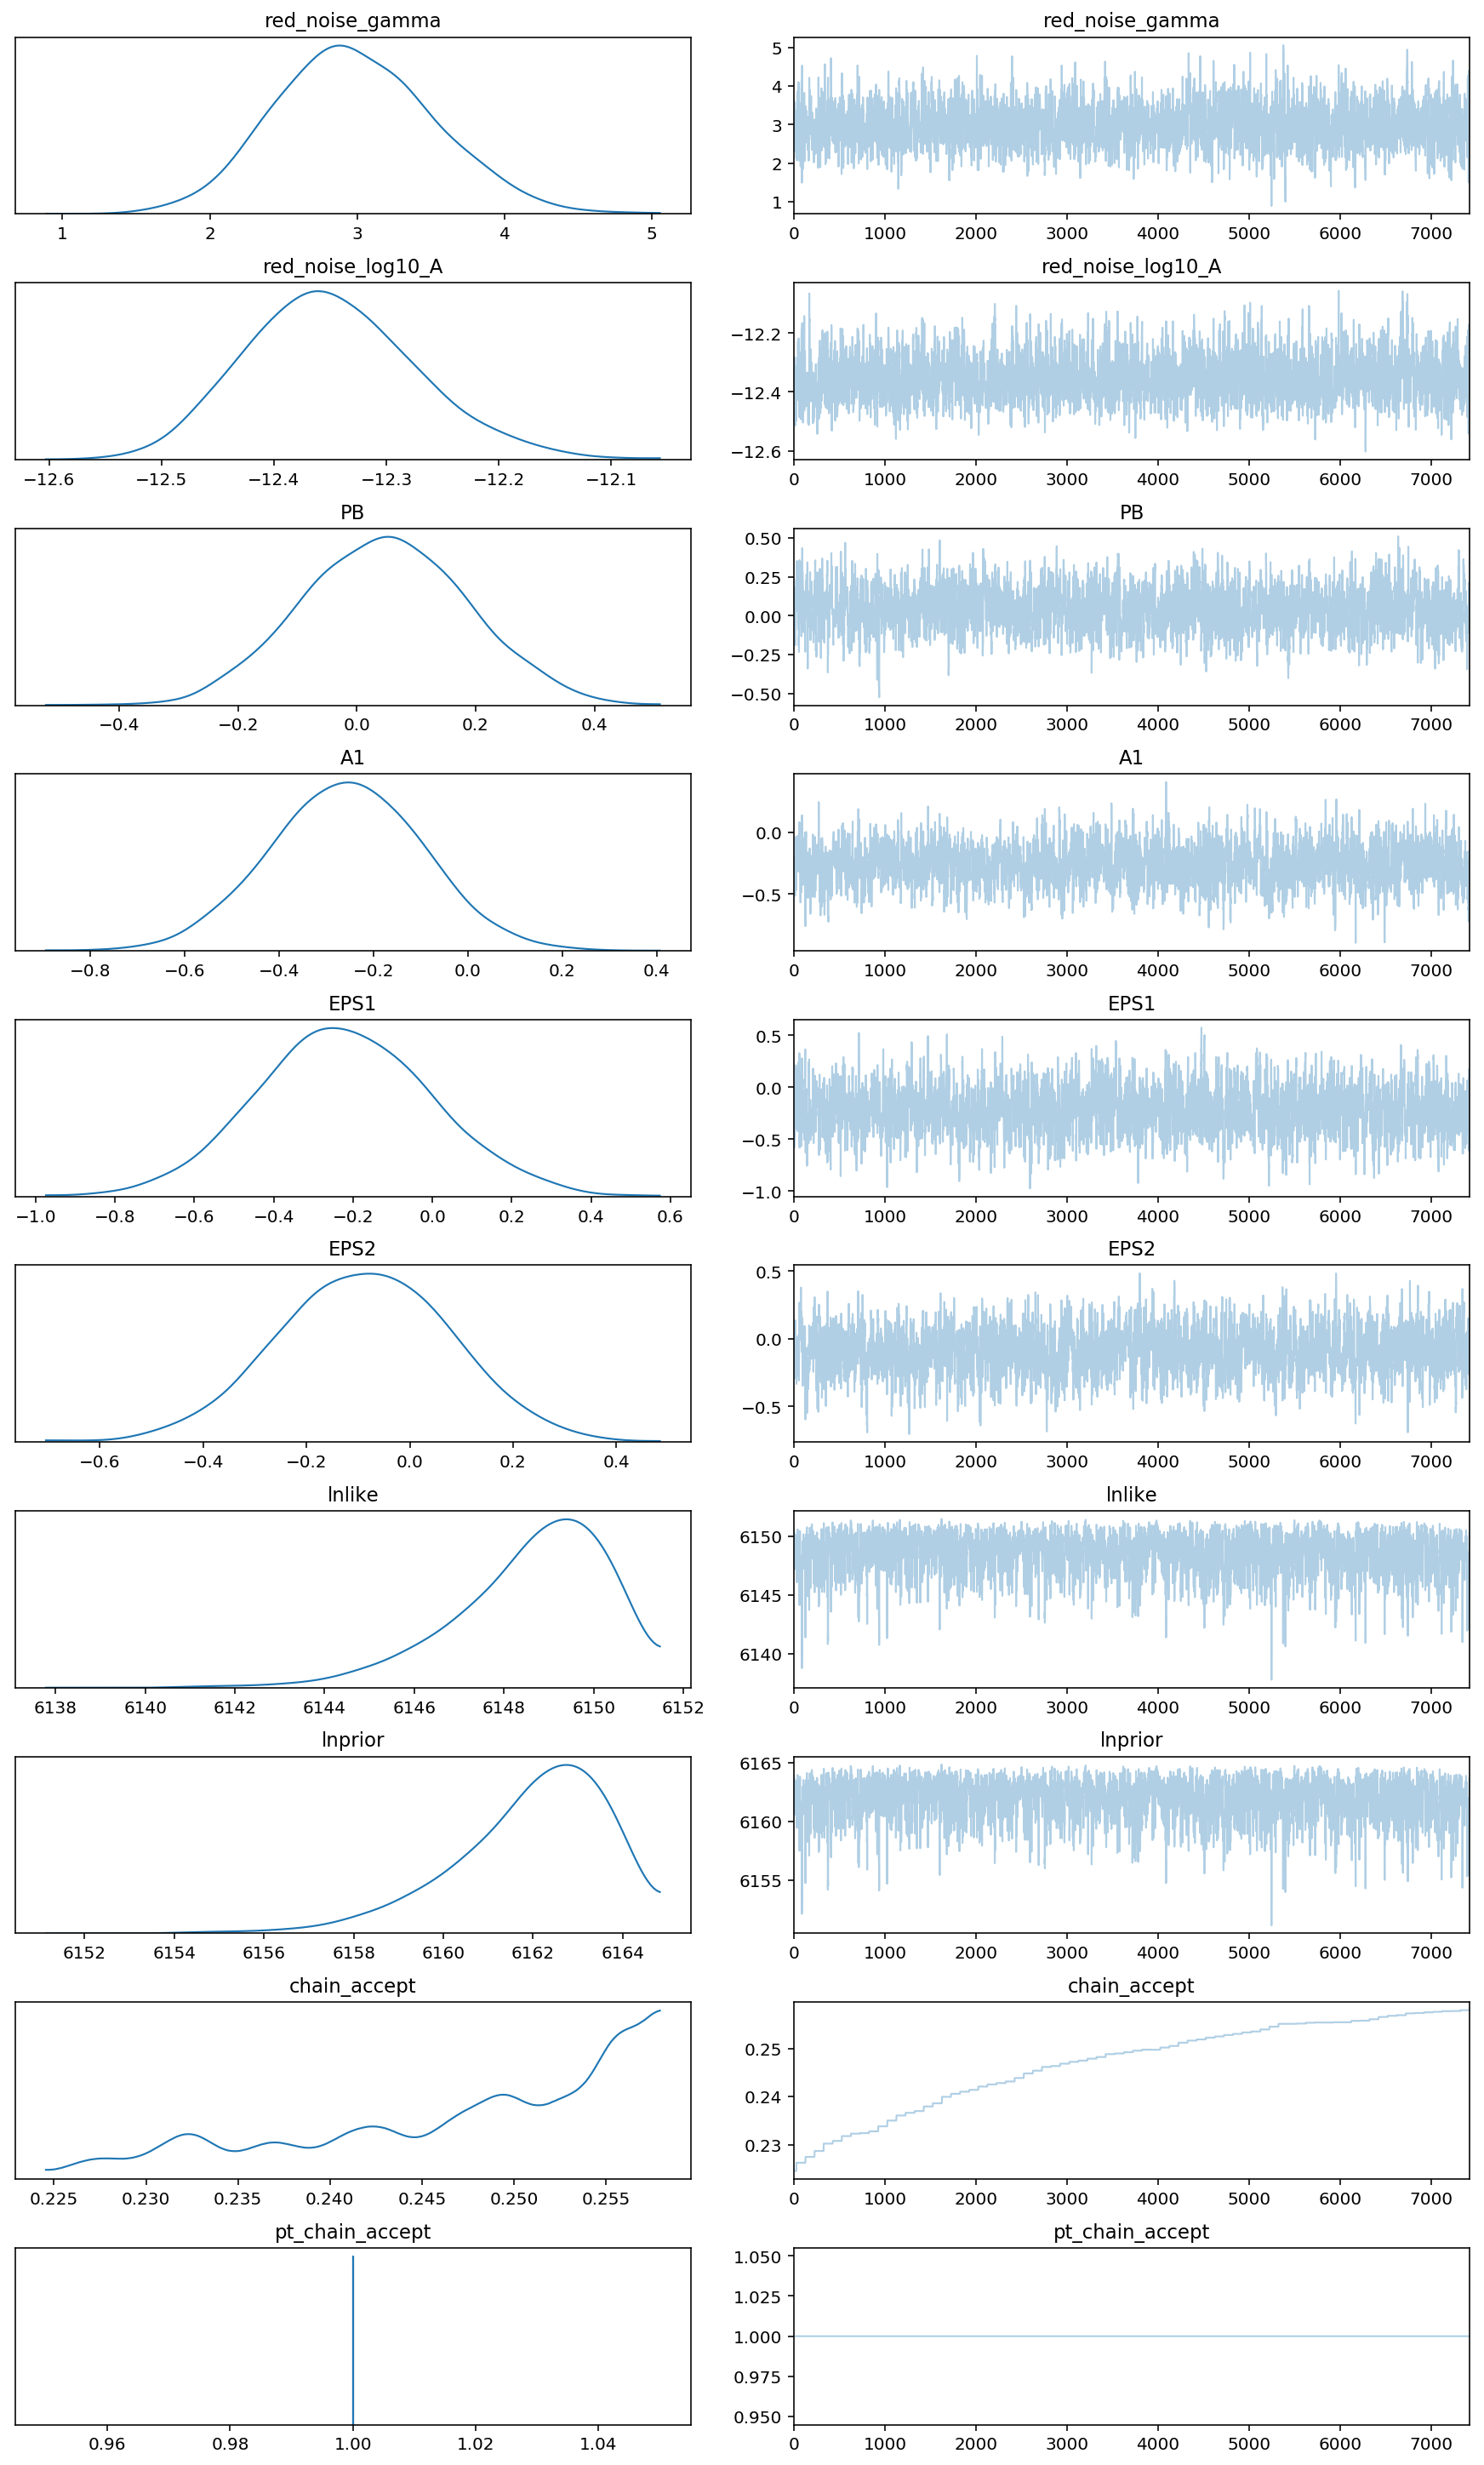

In [31]:
az.plot_trace(az_comb_J2317_red_var_white_fixed,
              var_names=tmparam_list_J2317_red_var_white_fixed,
              coords={'chain':[2]});

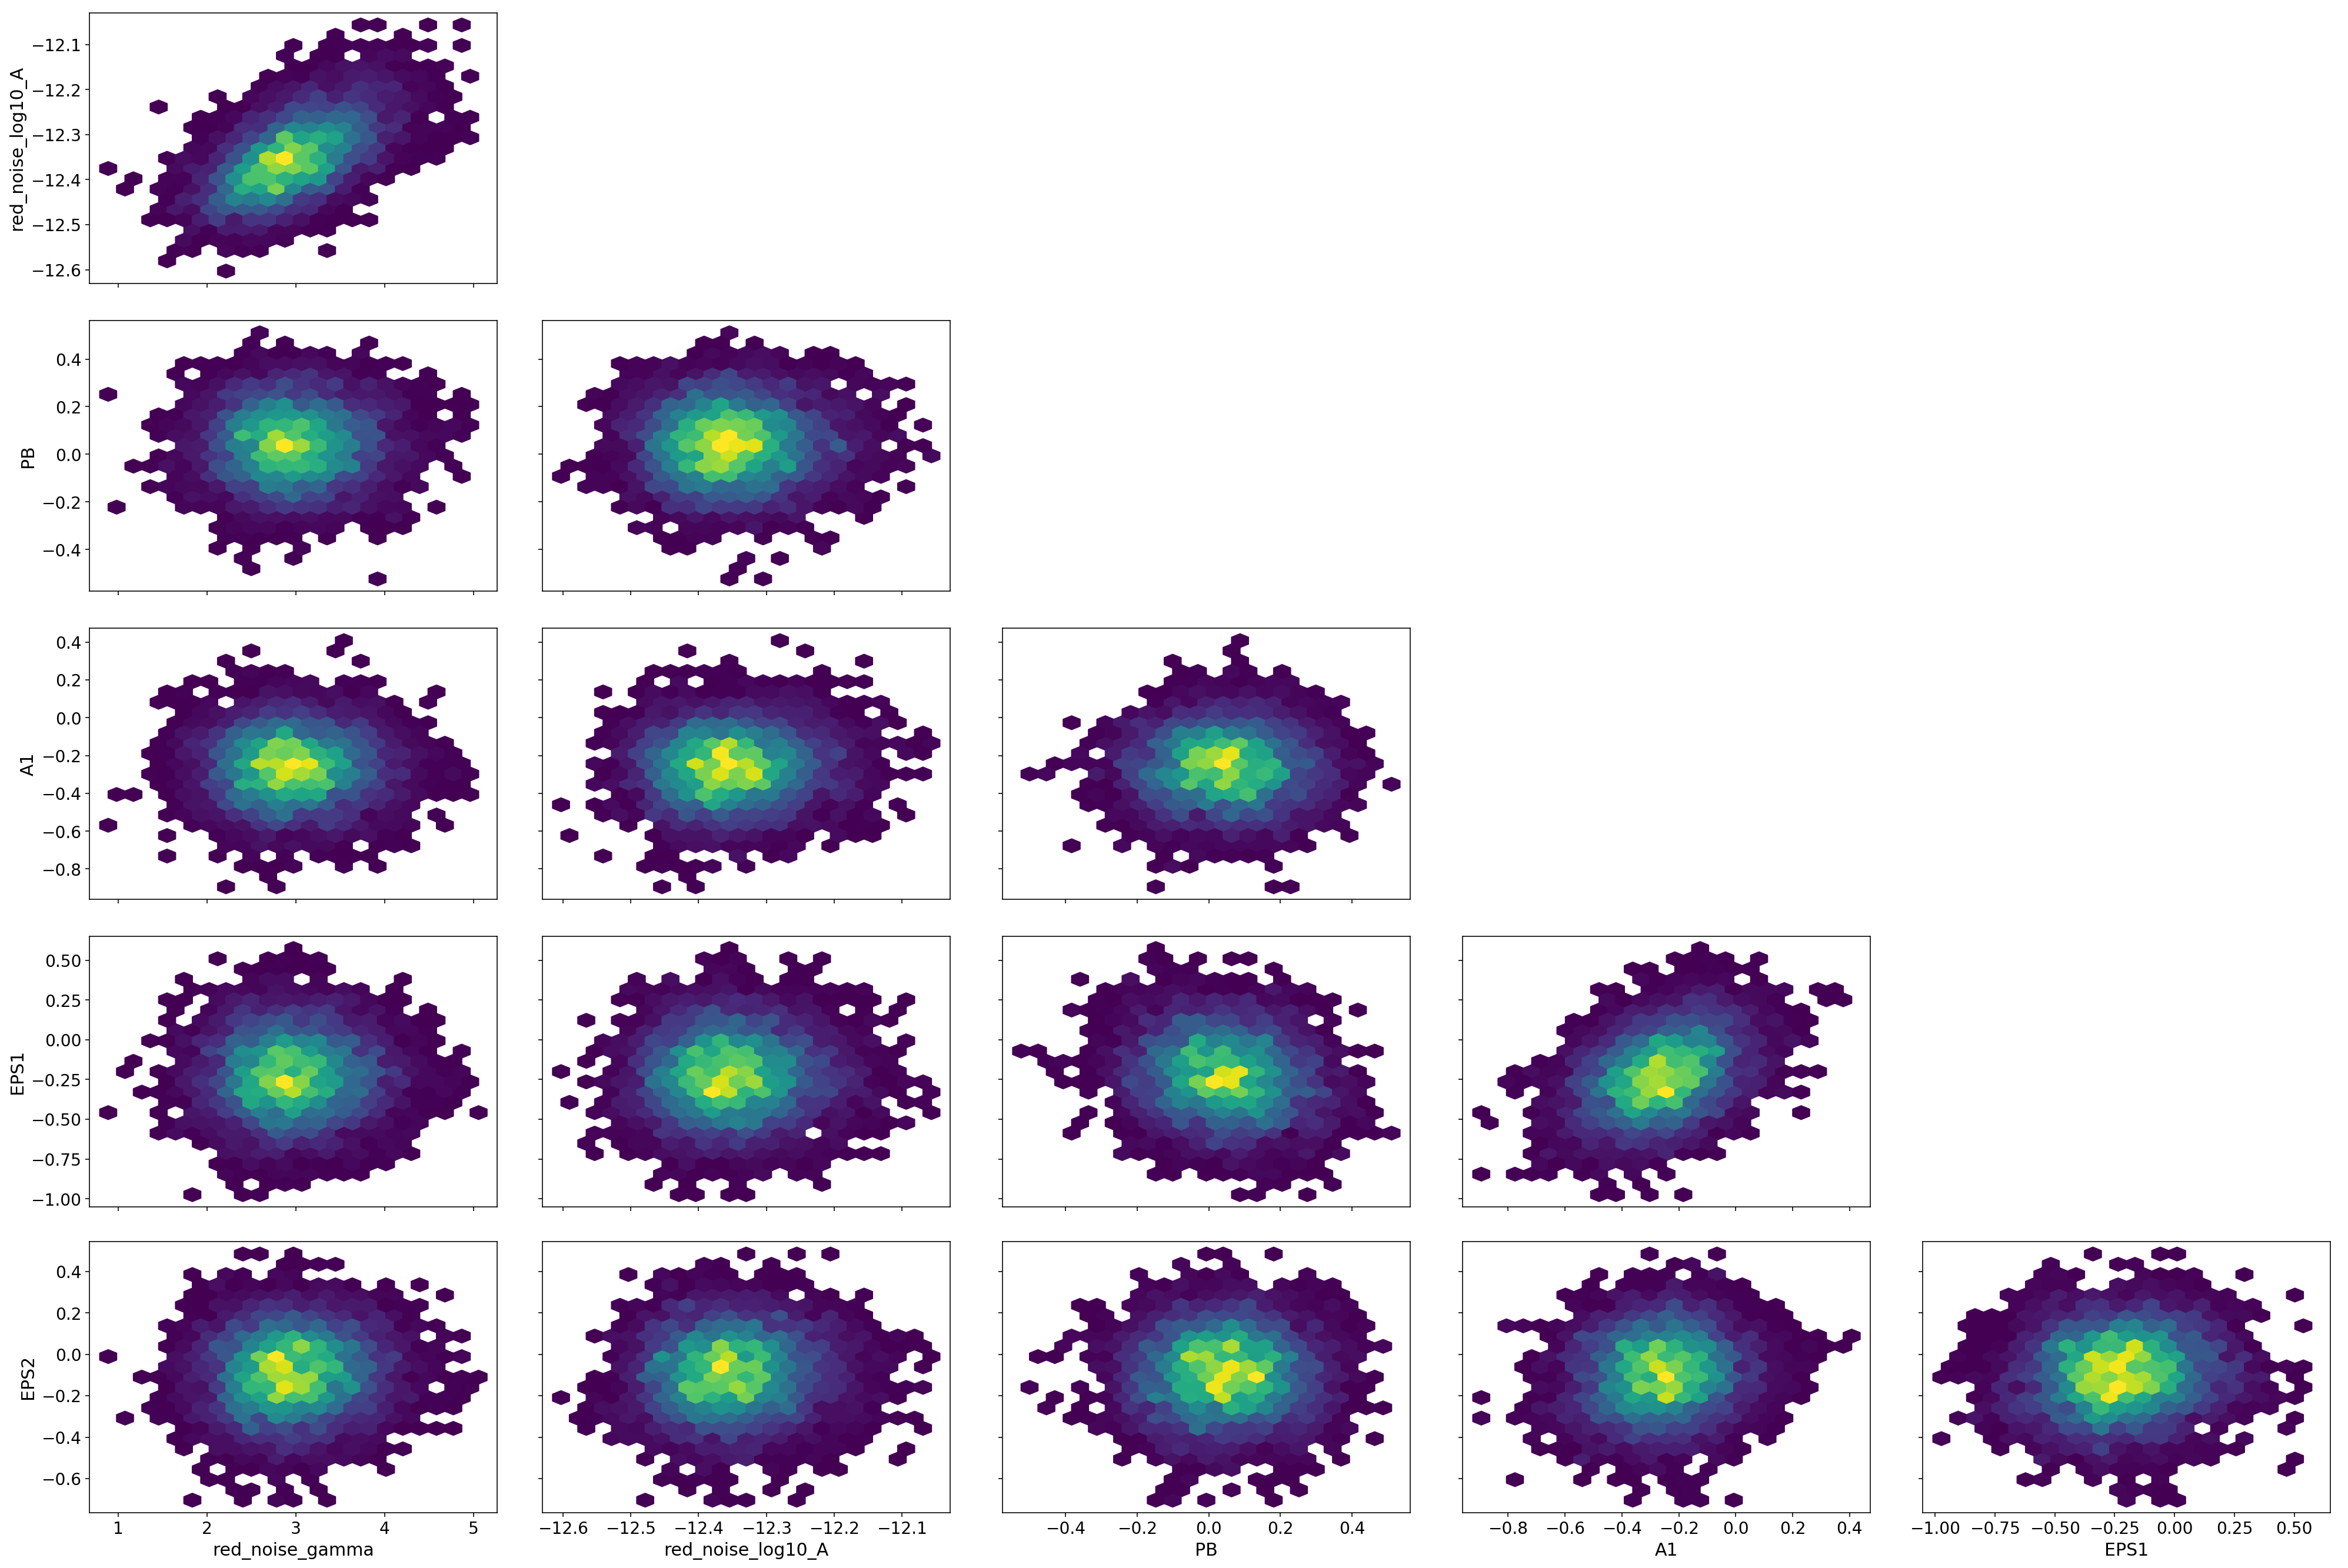

In [32]:
az.plot_pair(az_comb_J2317_red_var_white_fixed,
             var_names=tmparam_list_J2317_red_var_white_fixed[0:6],
             coords={'chain':[2]},
             kind='hexbin');